Titanic Project Example

Abstract:
In this notebook, I hope to show how a data scientist would go about working through a problem. 

Goal:
The goal is to correctly predict if someone survived the Titanic shipwreck. 

Note:
I thought it would be fun to see how well I could do in this competition without deep learning.

1. Understand the shape of the data (Histograms, box plots, etc.)
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Data Preprocessing for Model
6. Basic Model Building
7. Model Tuning
8. Ensemble Modle Building
9. Results

In [8]:
# Import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Special import
import seaborn as sns 

In [9]:
import os

def print_all_files(dirname: str):
    for dirname, _, filenames in os.walk(dirname):
        for filename in filenames:
            print(os.path.join(dirname, filename))

print_all_files('input')

input/gender_submission.csv
input/titanic.zip
input/test.csv
input/train.csv


In [11]:
train_data = pd.read_csv('input/train.csv')
test_data = pd.read_csv('input/test.csv')

In [19]:

# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

Handle numerical data

1. Made histograms to understand distributions
2. Corrplot
3. Pivot table comparing survival rate across numeric variables

In [22]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handle categorical data

1. Made bar charts to understand balance of classes
2. Made pivot tables to understand relationship with survival

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# All columns
print(train_data.columns)

# Quick way to separate numeric columns
print(train_data.describe().columns)

# Seperate the numeric and categorical values
train_data_num = train_data[['Age','SibSp','Parch','Fare']]
train_data_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


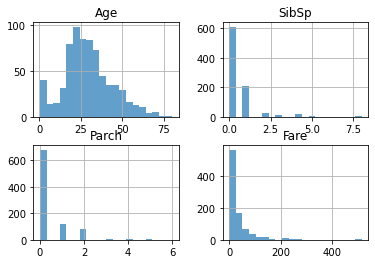

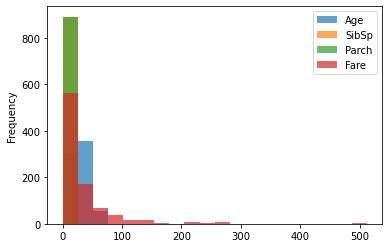

In [39]:
# Plot in the different charts
train_data_num.hist(bins=20, alpha=0.7)
plt.show()

# Plot in the same chart
train_data_num.plot.hist(bins=20, alpha=0.7)
plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


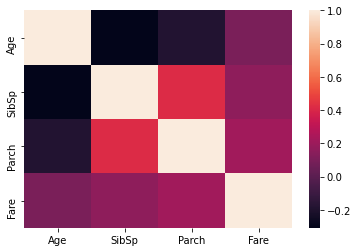

In [42]:
print(train_data_num.corr())
sns.heatmap(train_data_num.corr())
plt.show()